In [1]:
from discriminator.discriminator_wrapper import DiscriminatorWrapper, plot_losses
from coco_utils import load_coco_data_struct
import tensorflow as tf
import numpy as np

Using TensorFlow backend.


### Load data

In [2]:
attention_mode = True
attention_type = "textual"
if attention_mode:
    vocab_data, train_data, _ = load_coco_data_struct(base_dir="datasets/self_process", 
                                                             source_image_features='block5_conv4_max_pooled',
                                                             is_caption_separated=True,
                                                             mock_val=True)
    val_data, train_data = train_data.split(0.3)
else:
    vocab_data, train_data, val_data = load_coco_data_struct()


Loaded vocab data.
Embedding <class 'numpy.ndarray'> (2593, 304) float64
Word to index <class 'dict'> 2593
Index to word <class 'list'> 2593

Loaded train data.
Captions <class 'numpy.ndarray'> (407521, 19) int64
Image indices <class 'numpy.ndarray'> (407521,) int64
Image features <class 'numpy.ndarray'> (82783, 7, 7, 512) float32
Image urls <class 'numpy.ndarray'> (82783,) <U71

Loaded val data.
Captions <class 'numpy.ndarray'> (1000, 19) int64
Image indices <class 'numpy.ndarray'> (1000,) int64
Image features <class 'numpy.ndarray'> (1000, 7, 7, 512) float32
Image urls <class 'numpy.ndarray'> (1000,) <U71

Splitting train data with ratio 0.3

Loaded train data.
Captions <class 'numpy.ndarray'> (122256, 19) int64
Image indices <class 'numpy.ndarray'> (122256,) int64
Image features <class 'numpy.ndarray'> (82783, 7, 7, 512) float32
Image urls <class 'numpy.ndarray'> (82783,) <U71

Loaded train data.
Captions <class 'numpy.ndarray'> (285265, 19) int64
Image indices <class 'numpy.ndarra

### Pretrain and save

In [3]:
tf.reset_default_graph()
sess = tf.InteractiveSession()
disc = DiscriminatorWrapper(train_data, val_data, vocab_data, attention_type=attention_type)
tf.global_variables_initializer().run()

In [4]:
batch_size = 100
iter_num = 500
train_loss, val_loss = disc.pre_train(sess, iter_num=iter_num, batch_size=batch_size)

iter 0, loss: 0.6970201134681702
iter 50, loss: 0.6933766007423401
iter 100, loss: 0.6934674978256226
iter 150, loss: 0.7150857448577881
iter 200, loss: 0.6657445430755615
iter 250, loss: 0.5983245968818665
iter 300, loss: 0.5519874095916748
iter 350, loss: 0.5473873615264893
iter 400, loss: 0.5402397513389587
iter 450, loss: 0.5767579078674316


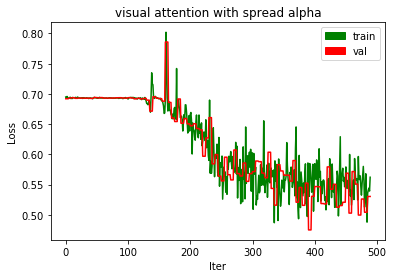

In [12]:
plot_losses(train_loss[10:], val_loss[10:], title="visual attention with spread alpha")

1.0 | Avg reward: 0.06111077219247818


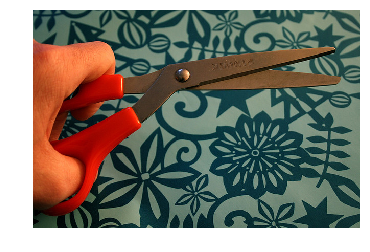

a               1.0, attn: 2.5e-08
person          1.0, attn: 5.2e-08
holding         1.0, attn: 2.9e-06
a               1.0, attn: 2.5e-08
pair            1.0, attn: 5.5e-07
of              1.0, attn: 5.2e-07
scissors        1.0, attn: 1.0
with            1.0, attn: 8.1e-08
orange          1.0, attn: 1.2e-07
handles         1.0, attn: 1.7e-06
<END>           1.0, attn: 1.3e-06
- - - -
1.0 | Avg reward: 0.05536571517586708


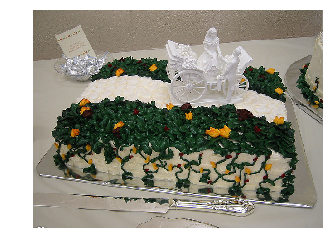

wedding         1.0, attn: 1.1e-06
cake            1.0, attn: 1.0
with            1.0, attn: 5.9e-12
figure          1.0, attn: 4.9e-11
of              1.0, attn: 2.9e-11
bride           1.0, attn: 7.5e-10
and             1.0, attn: 1.8e-10
groom           1.0, attn: 4.4e-08
on              1.0, attn: 2.6e-10
a               1.0, attn: 1.7e-12
silver          1.0, attn: 4.9e-13
platter         1.0, attn: 0.0011
<END>           1.0, attn: 7.1e-11
- - - -
1.0 | Avg reward: 0.020071042701601982


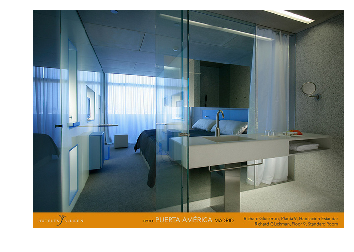

a               0.0, attn: 1.8e-16
hotel           0.0, attn: 6.5e-10
room            0.0, attn: 2.7e-05
with            0.0, attn: 6.4e-16
see             0.0, attn: 1.4e-14
through         0.0, attn: 6.8e-15
glass           0.0, attn: 7.1e-14
in              0.0, attn: 5.3e-14
the             0.0, attn: 3.4e-15
bathroom        0.0, attn: 1.0
<END>           0.0, attn: 7.7e-15
- - - -
1.0 | Avg reward: 0.08501794934272766


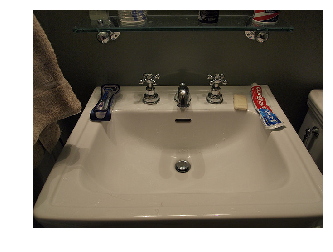

a               1.0, attn: 1.3e-16
towel           1.0, attn: 0.0001
hangs           1.0, attn: 5.6e-15
next            1.0, attn: 1.8e-14
to              1.0, attn: 1.5e-14
the             1.0, attn: 2e-15
bathroom        1.0, attn: 1.0
sink            1.0, attn: 1.9e-05
<END>           1.0, attn: 5.1e-15
- - - -
1.0 | Avg reward: 0.08086930960416794


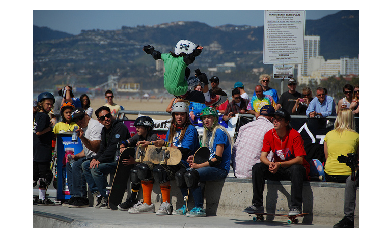

a               1.0, attn: 0.0012
young           1.0, attn: 0.19
person          1.0, attn: 0.045
flying          1.0, attn: 0.99
through         1.0, attn: 0.0031
the             1.0, attn: 0.0022
air             1.0, attn: 0.014
while           1.0, attn: 0.025
riding          1.0, attn: 0.0094
a               1.0, attn: 0.0012
skateboard      1.0, attn: 0.0044
<END>           1.0, attn: 0.039
- - - -
0.0 | Avg reward: 0.0725378543138504


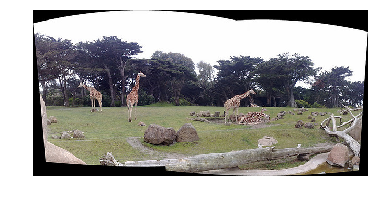

a               1.0, attn: 0.001
green           1.0, attn: 0.02
double          1.0, attn: 0.41
decker          1.0, attn: 0.23
bus             1.0, attn: 0.017
parked          1.0, attn: 0.059
on              1.0, attn: 0.29
the             1.0, attn: 0.058
side            1.0, attn: 0.029
of              1.0, attn: 0.038
a               1.0, attn: 0.001
road            1.0, attn: 0.12
<END>           1.0, attn: 0.088
- - - -
0.0 | Avg reward: 0.003374614519998431


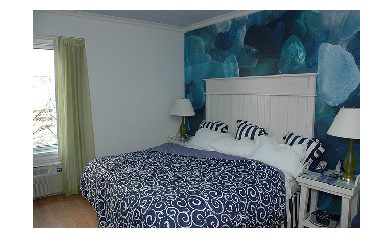

someone         0.0, attn: 0.28
swing           0.0, attn: 0.45
at              0.0, attn: 0.017
a               0.0, attn: 0.001
ball            0.0, attn: 0.00068
in              0.0, attn: 0.34
a               0.0, attn: 0.001
baseball        0.0, attn: 0.0022
diamond         0.0, attn: 0.0024
<END>           0.0, attn: 0.036
- - - -
0.0 | Avg reward: 0.07097510248422623


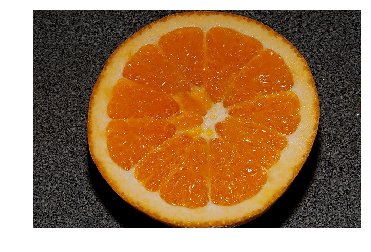

a               1.0, attn: 2.8e-08
pair            1.0, attn: 6.2e-07
of              1.0, attn: 6.2e-07
scissors        1.0, attn: 1.0
mounted         1.0, attn: 2.7e-07
onto            1.0, attn: 2.8e-06
a               1.0, attn: 2.8e-08
wooden          1.0, attn: 1.2e-06
door            1.0, attn: 0.00027
<END>           1.0, attn: 1.5e-06
- - - -
0.0 | Avg reward: 0.05879853293299675


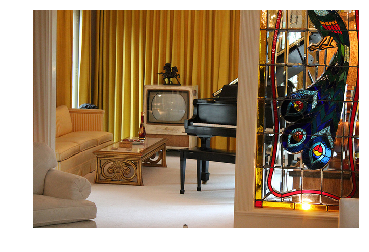

a               1.0, attn: 2.4e-15
toy             1.0, attn: 1.4e-11
stove           1.0, attn: 7.9e-05
top             1.0, attn: 2e-13
oven            1.0, attn: 0.016
sitting         1.0, attn: 1.6e-10
inside          1.0, attn: 8.2e-14
of              1.0, attn: 3.9e-14
a               1.0, attn: 2.4e-15
toy             1.0, attn: 1.4e-11
kitchen         1.0, attn: 0.99
<END>           1.0, attn: 9.5e-14
- - - -
0.0 | Avg reward: 0.04880744591355324


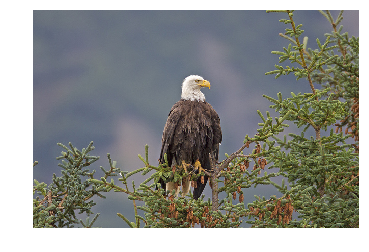

four            1.0, attn: 1.7e-05
yellow          1.0, attn: 4.7e-07
red             1.0, attn: 2.4e-07
and             1.0, attn: 0.0001
white           1.0, attn: 2.2e-05
bicycles        1.0, attn: 0.00064
a               1.0, attn: 6.6e-07
building        1.0, attn: 2.5e-08
and             1.0, attn: 0.0001
some            1.0, attn: 5e-05
trees           1.0, attn: 1.0
<END>           1.0, attn: 3.2e-05
- - - -


0.73453772

In [6]:
disc.examine_validation(sess, batch_size=5)

In [7]:
model_name = "discriminator2"
disc.save_model(sess, model_name=model_name)

### Assign rewards

1.0 | Avg reward: 0.20882458984851837


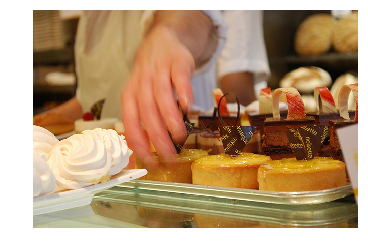

beautiful       1.0, attn: 7.1e-11
pastries        1.0, attn: 1.0
with            1.0, attn: 6e-13
hand            1.0, attn: 3.5e-09
- - - -
1.0 | Avg reward: 0.10101569443941116


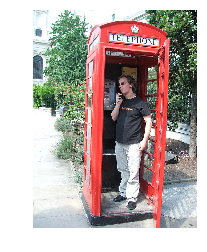

a               1.0, attn: 0.00048
man             1.0, attn: 0.38
in              1.0, attn: 0.28
black           1.0, attn: 0.00016
t-shirt         1.0, attn: 0.62
in              1.0, attn: 0.28
red             1.0, attn: 0.0002
phone           1.0, attn: 0.038
booth           1.0, attn: 0.0098
- - - -
1.0 | Avg reward: 0.19032682478427887


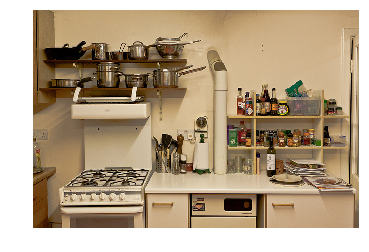

cat             1.0, attn: 1.0
dogs            1.0, attn: 1.2e-05
one             1.0, attn: 3.4e-09
<UNK>           1.0, attn: 2.3e-08
- - - -


In [8]:
train_image_idx = np.array([1, 2, 3])
captions = np.array(["beautiful pastries with hand", "a man in black t-shirt in red phone booth", "cat dogs one helloo"])
_, rewards, _ = disc.assign_reward(sess, 
                                   train_image_idx, 
                                   captions,
                                   image_idx_from_training=True, 
                                   to_examine=True)
assert rewards.shape[0] == len(train_image_idx)
sess.close()

### Load Model

In [9]:
tf.reset_default_graph()
sess = tf.InteractiveSession()
loaded_disc = DiscriminatorWrapper(train_data, val_data, vocab_data,
                                   load_session=sess,
                                   saved_model_name=model_name,
                                   attention_type=attention_type)
                                   

INFO:tensorflow:Restoring parameters from models/discr/discriminator2


In [10]:
_, rewards_after_loaded, _ = loaded_disc.assign_reward(sess, 
                                                       train_image_idx, 
                                                       captions,
                                                       image_idx_from_training=True, 
                                                       to_examine=False)

assert np.array_equal(rewards, rewards_after_loaded), "Loaded model should assign same rewards as trained model"

1.0 | Avg reward: 0.04470370337367058


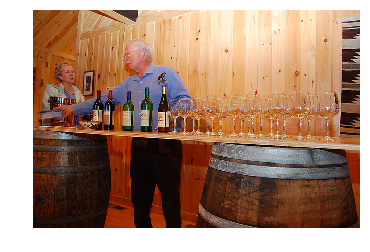

a               1.0, attn: 2.4e-06
person          1.0, attn: 4.1e-06
standing        1.0, attn: 1.9e-05
next            1.0, attn: 0.00024
to              1.0, attn: 0.00033
a               1.0, attn: 2.4e-06
lot             1.0, attn: 0.0001
of              1.0, attn: 5.7e-05
bottles         1.0, attn: 0.54
and             1.0, attn: 0.00023
wine            1.0, attn: 0.26
glasses         1.0, attn: 0.22
<END>           1.0, attn: 0.00014
- - - -
1.0 | Avg reward: 0.10648927092552185


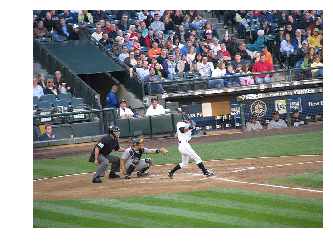

a               1.0, attn: 0.00064
baseball        1.0, attn: 0.0037
player          1.0, attn: 3.7e-05
holding         1.0, attn: 0.88
a               1.0, attn: 0.00064
baseball        1.0, attn: 0.0037
bat             1.0, attn: 0.32
during          1.0, attn: 0.37
a               1.0, attn: 0.00064
game            1.0, attn: 0.0056
<END>           1.0, attn: 0.058
- - - -
1.0 | Avg reward: 0.0834740698337555


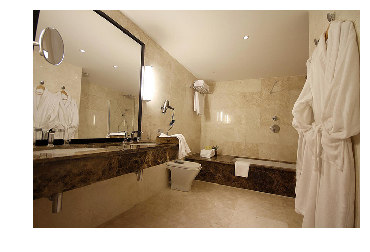

a               1.0, attn: 1.1e-16
large           1.0, attn: 7e-14
bathroom        1.0, attn: 1.0
with            1.0, attn: 4.1e-16
marble          1.0, attn: 1.1e-12
floor           1.0, attn: 2.5e-10
counter         1.0, attn: 2.5e-10
and             1.0, attn: 1.2e-14
bath            1.0, attn: 3.8e-06
<END>           1.0, attn: 4.1e-15
- - - -
1.0 | Avg reward: 0.06616237759590149


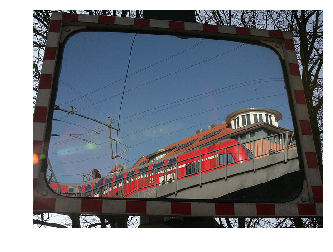

a               1.0, attn: 0.00086
red             1.0, attn: 0.00026
train           1.0, attn: 0.015
traveling       1.0, attn: 0.75
over            1.0, attn: 0.031
a               1.0, attn: 0.00086
gray            1.0, attn: 0.011
bridge          1.0, attn: 0.021
next            1.0, attn: 0.28
to              1.0, attn: 0.055
a               1.0, attn: 0.00086
building        1.0, attn: 5.6e-05
<END>           1.0, attn: 0.031
- - - -
1.0 | Avg reward: 0.06432019919157028


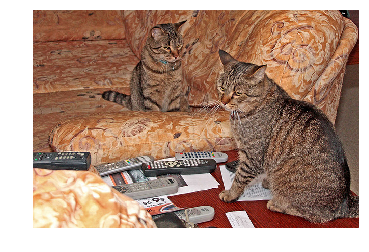

two             1.0, attn: 1.4e-06
cats            1.0, attn: 1.0
together        1.0, attn: 0.00023
next            1.0, attn: 1.6e-05
to              1.0, attn: 9.5e-06
an              1.0, attn: 6.6e-08
assortment      1.0, attn: 0.0016
of              1.0, attn: 1.5e-06
remote          1.0, attn: 0.00031
controls        1.0, attn: 2.6e-05
<END>           1.0, attn: 3.7e-06
- - - -
0.0 | Avg reward: 0.01842917688190937


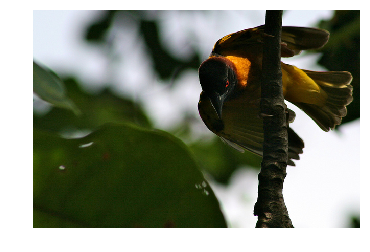

man             0.0, attn: 3.2e-09
standing        0.0, attn: 5.5e-11
in              0.0, attn: 2.6e-09
a               0.0, attn: 8.4e-12
living          0.0, attn: 8.2e-05
room            0.0, attn: 1.0
holding         0.0, attn: 1.6e-09
up              0.0, attn: 7.5e-10
a               0.0, attn: 8.4e-12
wii             0.0, attn: 1.9e-06
controller      0.0, attn: 4.2e-09
<END>           0.0, attn: 3.7e-10
- - - -
0.0 | Avg reward: 0.07049635797739029


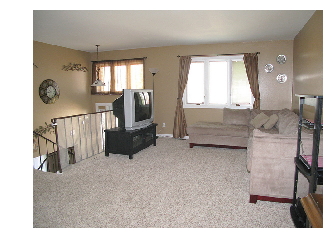

<UNK>           1.0, attn: 2.7e-15
box             1.0, attn: 9.8e-13
sitting         1.0, attn: 8.1e-12
on              1.0, attn: 1.5e-14
top             1.0, attn: 1e-14
of              1.0, attn: 1.7e-15
toilet          1.0, attn: 0.0081
in              1.0, attn: 2.7e-14
bathroom        1.0, attn: 0.99
<END>           1.0, attn: 4.3e-15
- - - -
0.0 | Avg reward: 0.05510925501585007


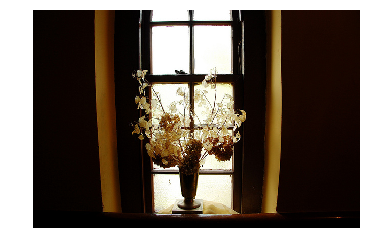

a               1.0, attn: 5.4e-10
woman           1.0, attn: 5e-07
sitting         1.0, attn: 2.1e-05
in              1.0, attn: 1.8e-07
a               1.0, attn: 5.4e-10
chair           1.0, attn: 0.44
next            1.0, attn: 6.3e-08
to              1.0, attn: 6.7e-08
a               1.0, attn: 5.4e-10
table           1.0, attn: 0.62
filled          1.0, attn: 1.8e-08
with            1.0, attn: 1.9e-09
junk            1.0, attn: 0.00093
<END>           1.0, attn: 2.5e-08
- - - -
0.0 | Avg reward: 0.0009036228875629604


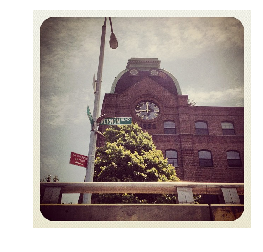

a               0.0, attn: 9.7e-15
thick           0.0, attn: 7.1e-13
crust           0.0, attn: 8.4e-06
cheese          0.0, attn: 0.001
pizza           0.0, attn: 1.0
on              0.0, attn: 1.2e-12
a               0.0, attn: 9.7e-15
white           0.0, attn: 6.3e-14
plate           0.0, attn: 6.5e-09
<END>           0.0, attn: 3.4e-13
- - - -
0.0 | Avg reward: 0.05690063163638115


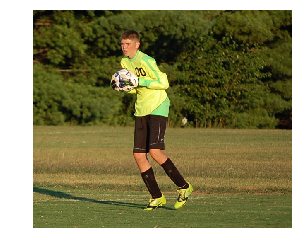

people          1.0, attn: 0.031
are             1.0, attn: 0.83
standing        1.0, attn: 0.007
at              1.0, attn: 0.01
a               1.0, attn: 0.0017
train           1.0, attn: 0.013
station         1.0, attn: 0.0011
as              1.0, attn: 0.015
a               1.0, attn: 0.0017
train           1.0, attn: 0.013
<UNK>           1.0, attn: 0.022
<END>           1.0, attn: 0.058
- - - -


0.56875944

In [11]:
loaded_disc.examine_validation(sess, batch_size=5)

### Online train